In [2]:
! pip install chart_studio

In [3]:
import numpy as np # algebra linear
import pandas as pd # processamento de dados, arquivo CSV (por exemplo pd.read_csv)
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns # library de visualização
import matplotlib.pyplot as plt # library de visualização
import chart_studio.plotly as py # library de visualização
import plotly.graph_objs as go # objeto gráfico do plotly
import warnings        
# ignore filters
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.

In [4]:
path = r'C:\Users\maria\Desktop\Data Science\01_PROJETO_INTEGRADOR\HISTORICO_2.xlsx'
data = pd.read_excel(path, sheet_name = 'SQL Results',delimiter = ',')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 0 to 1669
Data columns (total 7 columns):
DIA             1670 non-null datetime64[ns]
VDA             1670 non-null float64
CMV             1670 non-null float64
MTA             1670 non-null float64
DIA_SEMANA      1670 non-null int64
TIPO_FERIADO    1670 non-null object
FERIADO_BOOL    1670 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 91.4+ KB


Aqui nós vemos que o dataset não possui valores nulos
Como eu já tenho uma coluna booleana para meus feriados, eu vou deletar a coluna TIPO_FERIADO

In [6]:
data.head()

,DIA,VDA,CMV,MTA,DIA_SEMANA,TIPO_FERIADO,FERIADO_BOOL
0,2015-01-02,8612.12,7498.66,0.0,6,0,0
1,2015-01-03,11836.79,10337.33,0.0,7,0,0
2,2015-01-04,3874.22,3387.06,0.0,1,0,0
3,2015-01-05,3457.79,3053.94,0.0,2,0,0
4,2015-01-06,8812.50,8644.14,0.0,3,0,0


0    1618
1      52
Name: FERIADO_BOOL, dtype: int64


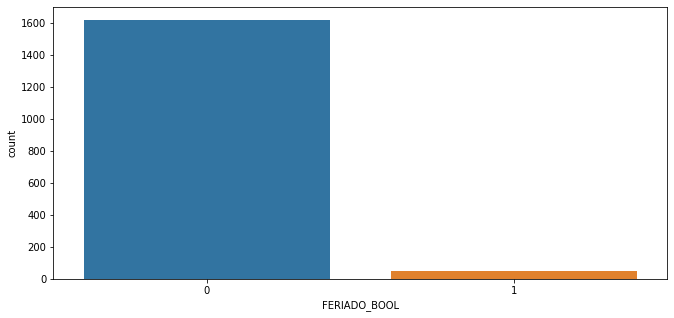

In [7]:
# FERIADOS
print(data['FERIADO_BOOL'].value_counts())
plt.figure(figsize=(11,5))
sns.countplot(data['FERIADO_BOOL'])
plt.show()

C:\Users\maria\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



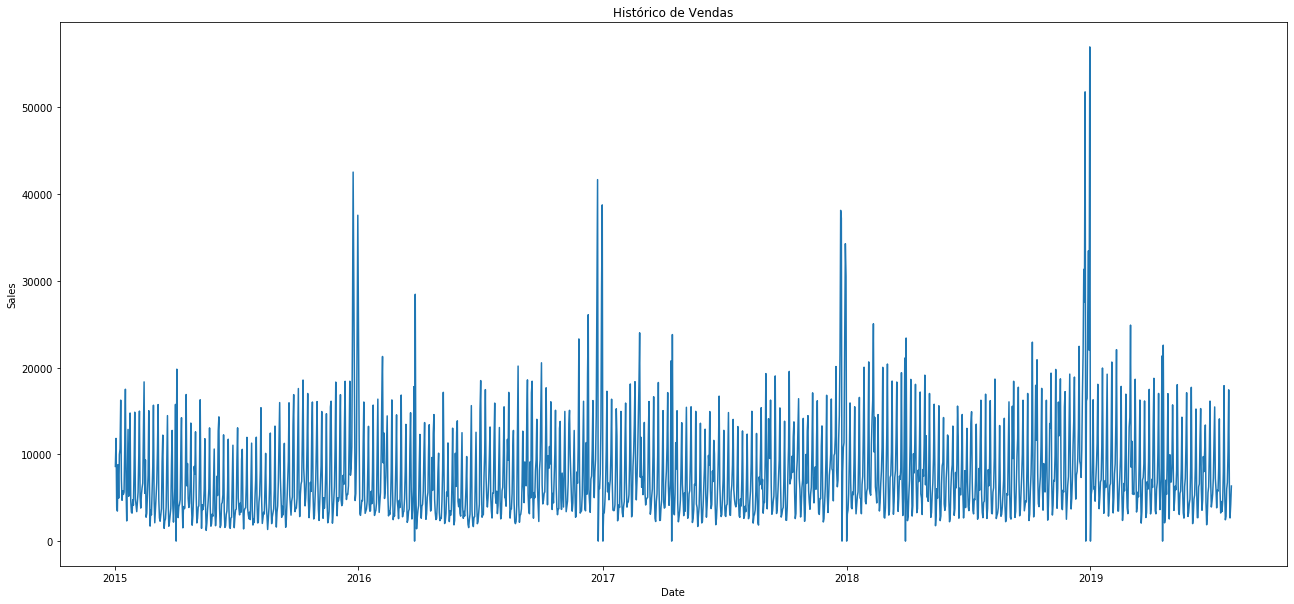

In [8]:
plt.figure(figsize=(22,10))
plt.plot(data.DIA, data.VDA)
plt.title('Histórico de Vendas')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [9]:
# Embora não sejam de fato outliers, aqui eu quero verificar a razão dessas vendas tão distintas. 
# Sem muito esforço vemos que há muitos dias que estão perto das festas de fim de ano ou feriados
outliers = data.loc[data.VDA > 20000, :]
outliers.head(10)

,DIA,VDA,CMV,MTA,DIA_SEMANA,TIPO_FERIADO,FERIADO_BOOL
355,2015-12-23,24316.46,20438.31,0.00,4,0,0
356,2015-12-24,42530.27,35955.90,0.00,5,0,0
361,2015-12-30,22931.86,19633.90,0.00,4,0,0
362,2015-12-31,37558.09,32068.96,0.00,5,0,0
398,2016-02-06,21278.57,18660.20,0.00,7,0,0
447,2016-03-26,28448.67,25228.69,0.00,7,0,0
601,2016-08-27,20172.41,17991.44,0.00,7,0,0
636,2016-10-01,20551.84,17921.34,0.00,7,0,0
692,2016-11-26,23300.32,21848.76,0.00,7,0,0
706,2016-12-10,26092.47,24148.16,62983.28,7,0,0


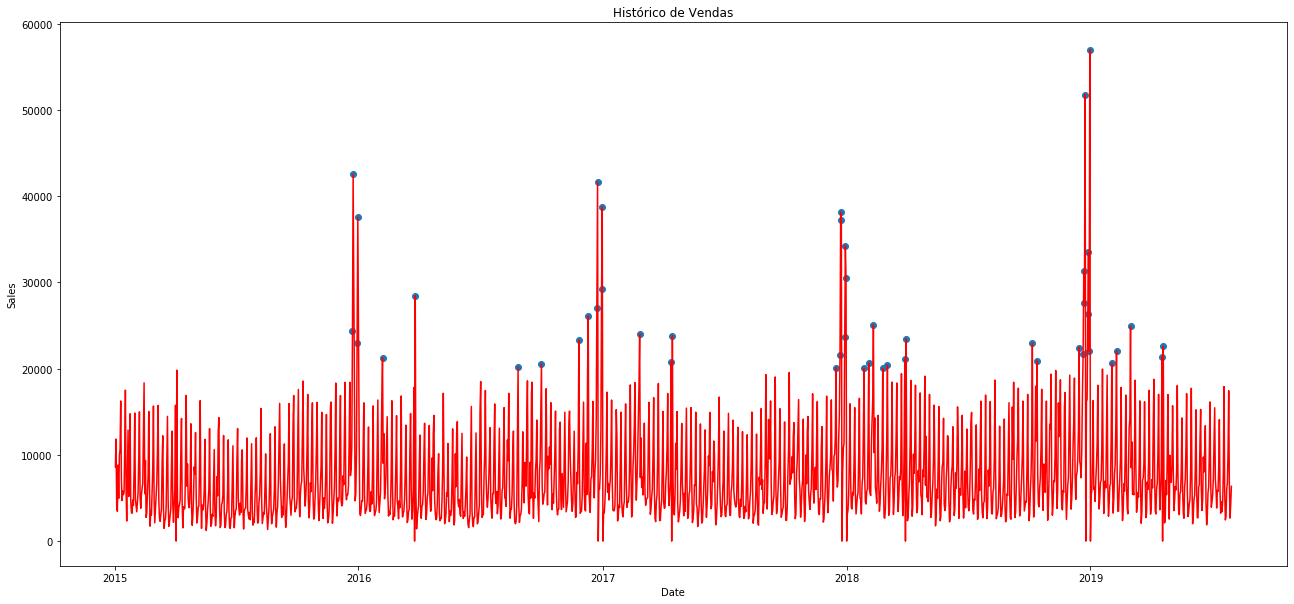

In [10]:
# Vamos plotar os 'outliers'
plt.figure(figsize=(22,10))
plt.plot(data.DIA, data.VDA, 'r')
plt.scatter(outliers.DIA, outliers.VDA)
plt.title('Histórico de Vendas')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [11]:
ts = data.copy()

In [12]:
ts['ds'] = ts['DIA']

In [13]:
ts['y'] = ts['VDA']

In [14]:
lista = ['DIA', 'VDA', 'DIA_SEMANA', 'FERIADO_BOOL', 'MTA', 'CMV', 'TIPO_FERIADO']
ts = ts.drop(columns = lista)
ts.head()

,ds,y
0,2015-01-02,8612.12
1,2015-01-03,11836.79
2,2015-01-04,3874.22
3,2015-01-05,3457.79
4,2015-01-06,8812.50


In [15]:
ts.index = ts.ds
ts = ts.drop(columns = 'ds')
ts.head()

,y
ds,
2015-01-02,8612.12
2015-01-03,11836.79
2015-01-04,3874.22
2015-01-05,3457.79
2015-01-06,8812.50


In [16]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1670 entries, 2015-01-02 to 2019-07-31
Data columns (total 1 columns):
y    1670 non-null float64
dtypes: float64(1)
memory usage: 26.1 KB


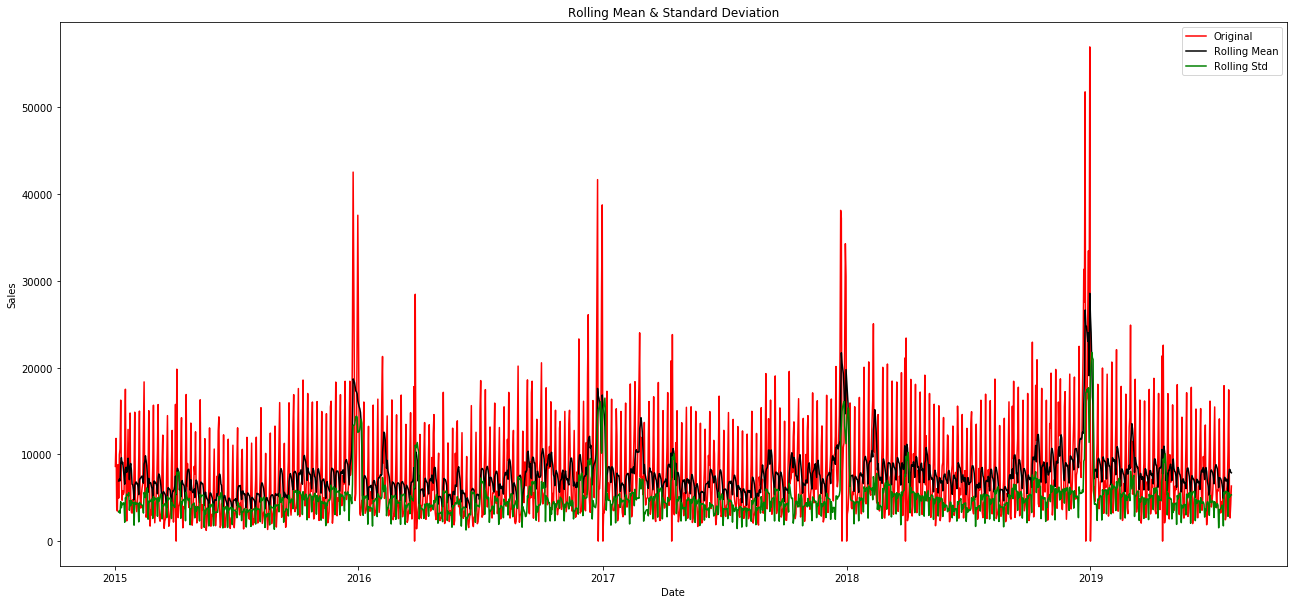

Test statistic:  -6.070005720277072
p-value:  1.1569415220647783e-07
Critical Values: {'1%': -3.4343266370047805, '5%': -2.863296457495669, '10%': -2.567705097465208}


In [17]:
# adfuller library 
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(6).mean()
    rolstd = ts.rolling(6).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts)
check_adfuller(ts.y)

Para verificar se meu dataset é estacionário, eu fiz um teste de Ad-Fuller. Como resultado, meu Teste global apresenta valores menores que os valores críticos, assim como meu p-value é bem baixo, mostrando que meus resultados não são significamente estatisticos. Porém, vale a pena analisarmos os resultados locais. Dessa forma, vamos dividir o dataset em anos.

In [18]:
# Criando uma coluna para ano
ts["year"] = ts.index.year
ts.head()

,y,year
ds,,
2015-01-02,8612.12,2015
2015-01-03,11836.79,2015
2015-01-04,3874.22,2015
2015-01-05,3457.79,2015
2015-01-06,8812.50,2015


In [19]:
# Criando vários datasets, para verificar a estacionariedade do ano
ts_2015 = ts.loc[(ts.year == 2015), :]
ts_2016 = ts.loc[(ts.year == 2016), :]
ts_2017 = ts.loc[(ts.year == 2017), :]
ts_2018 = ts.loc[(ts.year == 2018), :]
ts_2019 = ts.loc[(ts.year == 2019), :]

In [20]:
print(ts_2015.year.unique(), 
      ts_2016.year.unique(),
      ts_2017.year.unique(), 
      ts_2018.year.unique(), 
      ts_2019.year.unique())
# Verificando se meus datasets somente possue o range de um ano

[2015] [2016] [2017] [2018] [2019]


In [21]:
ts_2015 = ts_2015.drop(columns = 'year')
ts_2016 = ts_2016.drop(columns = 'year')
ts_2017 = ts_2017.drop(columns = 'year')
ts_2018 = ts_2018.drop(columns = 'year')
ts_2019 = ts_2019.drop(columns = 'year')

In [22]:
ts_2016.head()

,y
ds,
2016-01-02,12086.97
2016-01-03,3224.03
2016-01-04,2964.76
2016-01-05,3727.31
2016-01-06,4692.96


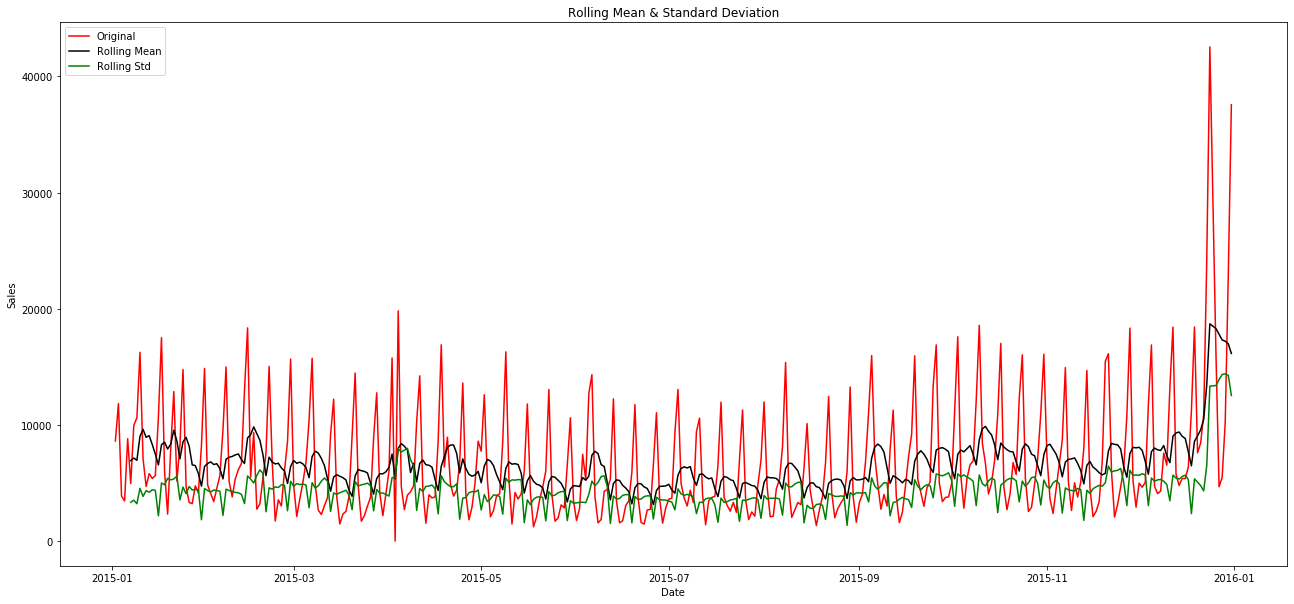

Test statistic:  1.2183063745536133
p-value:  0.9961099542892509
Critical Values: {'1%': -3.4492815848836296, '5%': -2.8698813715275406, '10%': -2.5712138845950587}


In [23]:
check_mean_std(ts_2015)
check_adfuller(ts_2015.y)

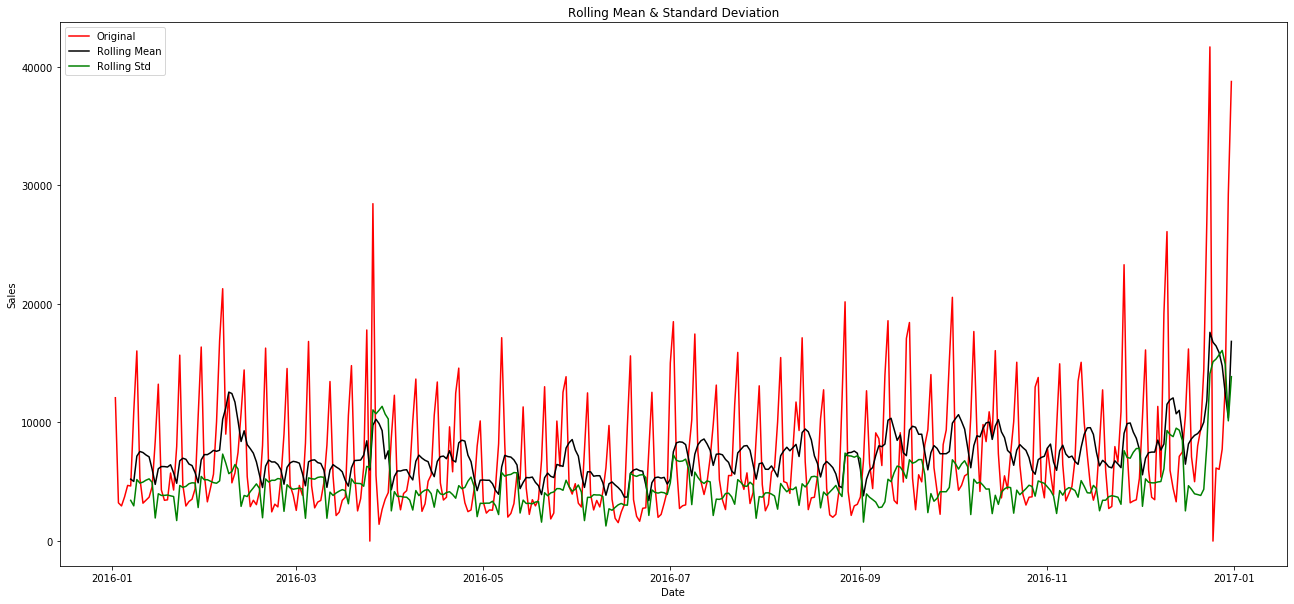

Test statistic:  -0.5360699788099169
p-value:  0.884783423948902
Critical Values: {'1%': -3.449226932880019, '5%': -2.869857365438656, '10%': -2.571201085130664}


In [24]:
check_mean_std(ts_2016)
check_adfuller(ts_2016.y)

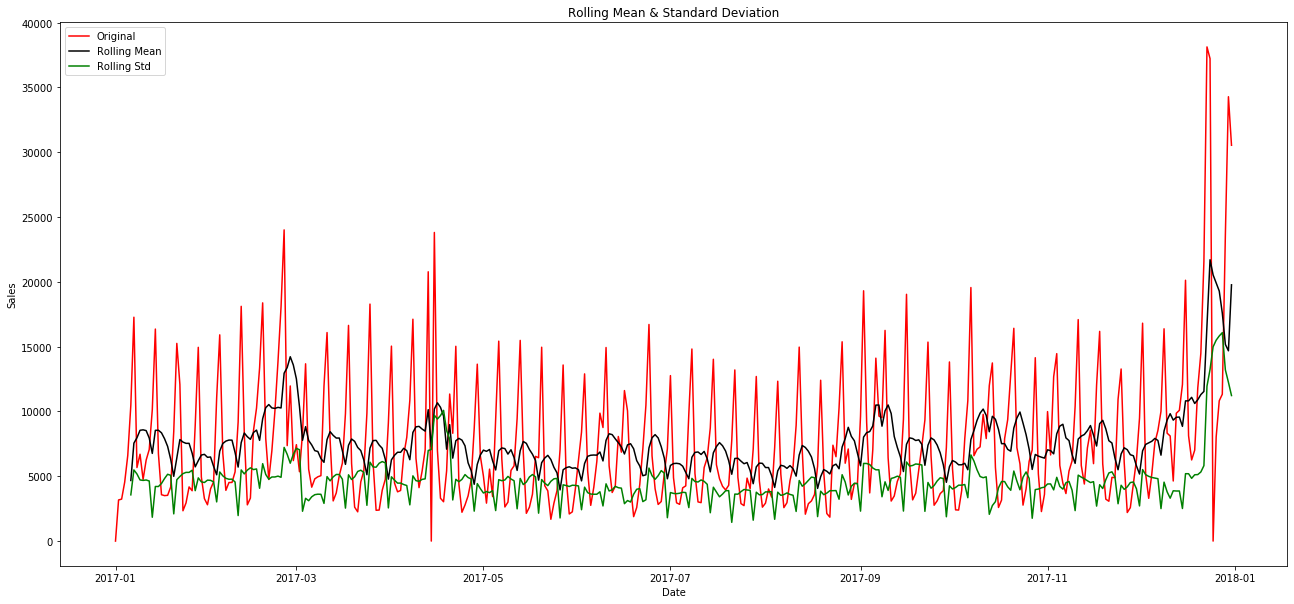

Test statistic:  -0.9814154274001023
p-value:  0.7599821058937479
Critical Values: {'1%': -3.449226932880019, '5%': -2.869857365438656, '10%': -2.571201085130664}


In [25]:
check_mean_std(ts_2017)
check_adfuller(ts_2017.y)

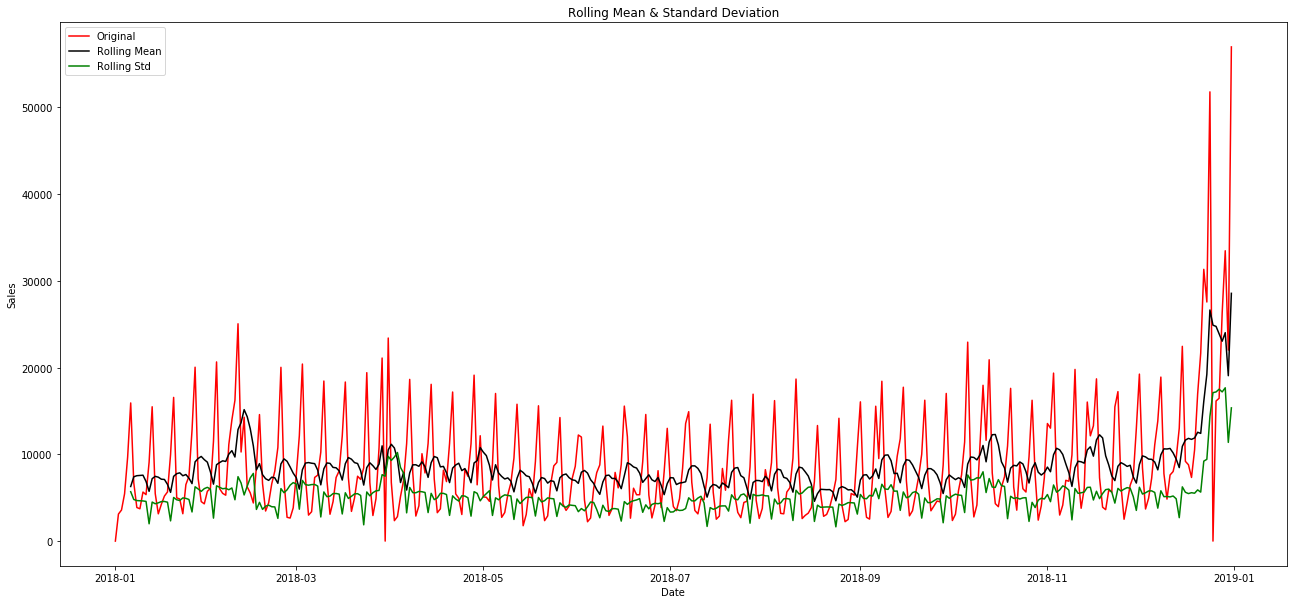

Test statistic:  1.9072242918811086
p-value:  0.998539553570782
Critical Values: {'1%': -3.4491725955218655, '5%': -2.8698334971428574, '10%': -2.5711883591836733}


In [26]:
check_mean_std(ts_2018)
check_adfuller(ts_2018.y)

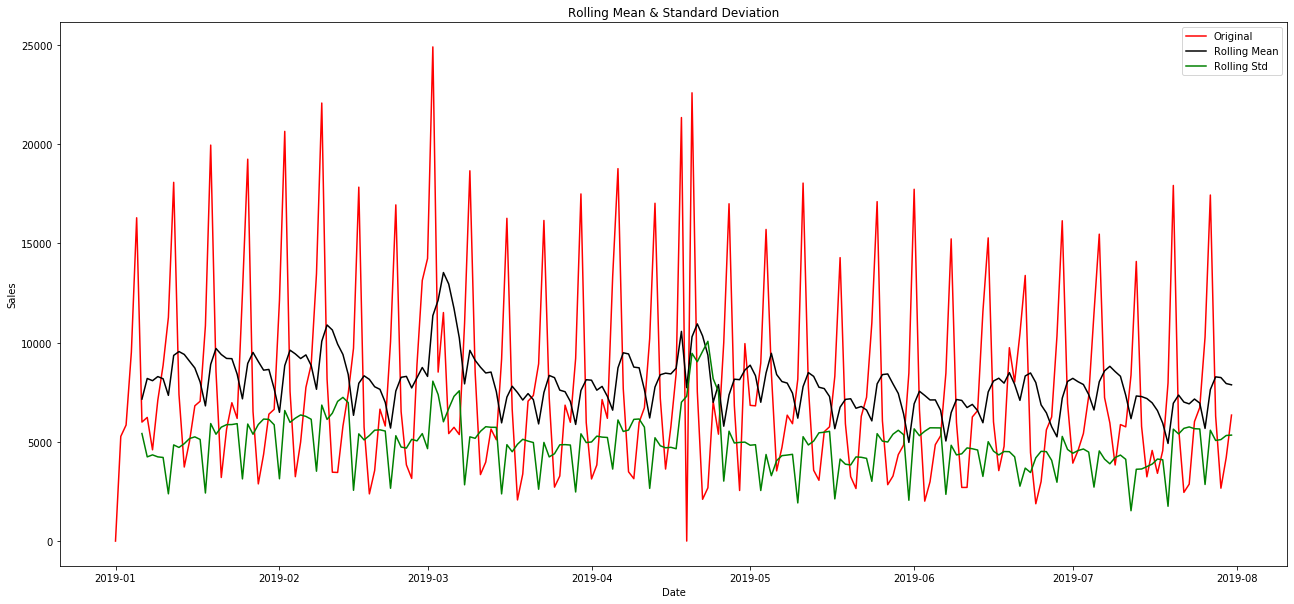

Test statistic:  -3.017689230709328
p-value:  0.033275146601278505
Critical Values: {'1%': -3.464161278384219, '5%': -2.876401960790147, '10%': -2.5746921001665974}


In [27]:
check_mean_std(ts_2019)
check_adfuller(ts_2019.y)

In [28]:
def diff(ts):
    ts_diff = ts - ts.shift()
    plt.figure(figsize=(22,10))
    plt.plot(ts_diff)
    plt.title("Differencing method") 
    plt.xlabel("Date")
    plt.ylabel("Differencing Sales")
    plt.show()
    ts_diff.dropna(inplace=True) # due to shifting there is nan values
    # check stationary: mean, variance(std)and adfuller test
    check_mean_std(ts_diff)
    check_adfuller(ts_diff.y)

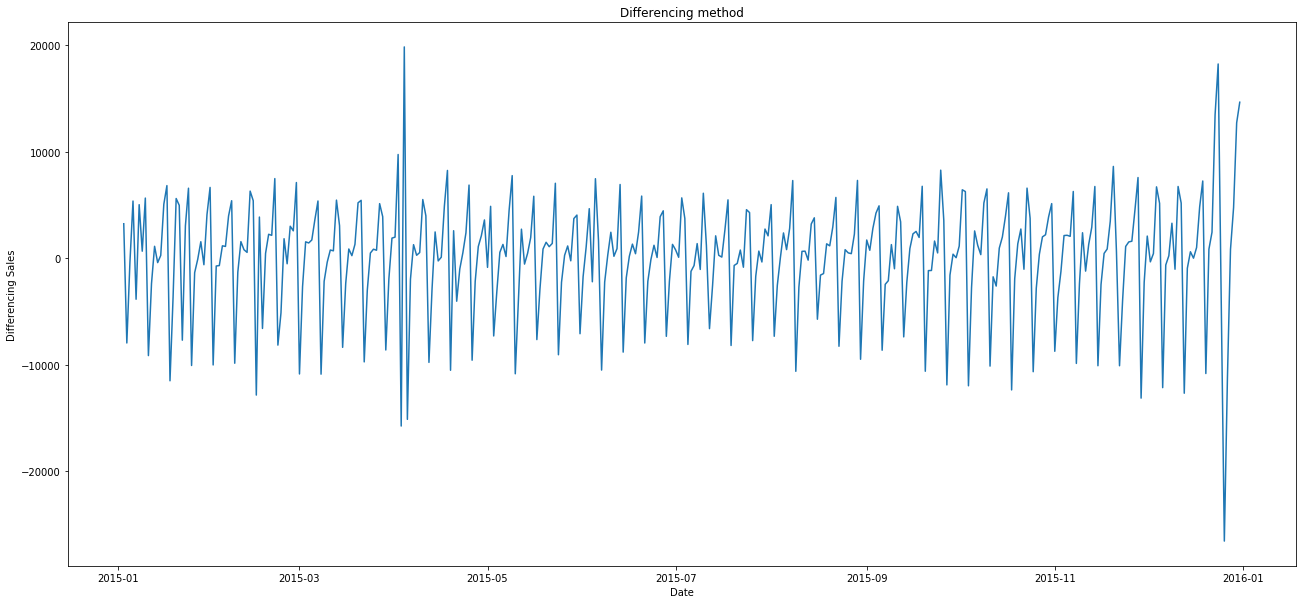

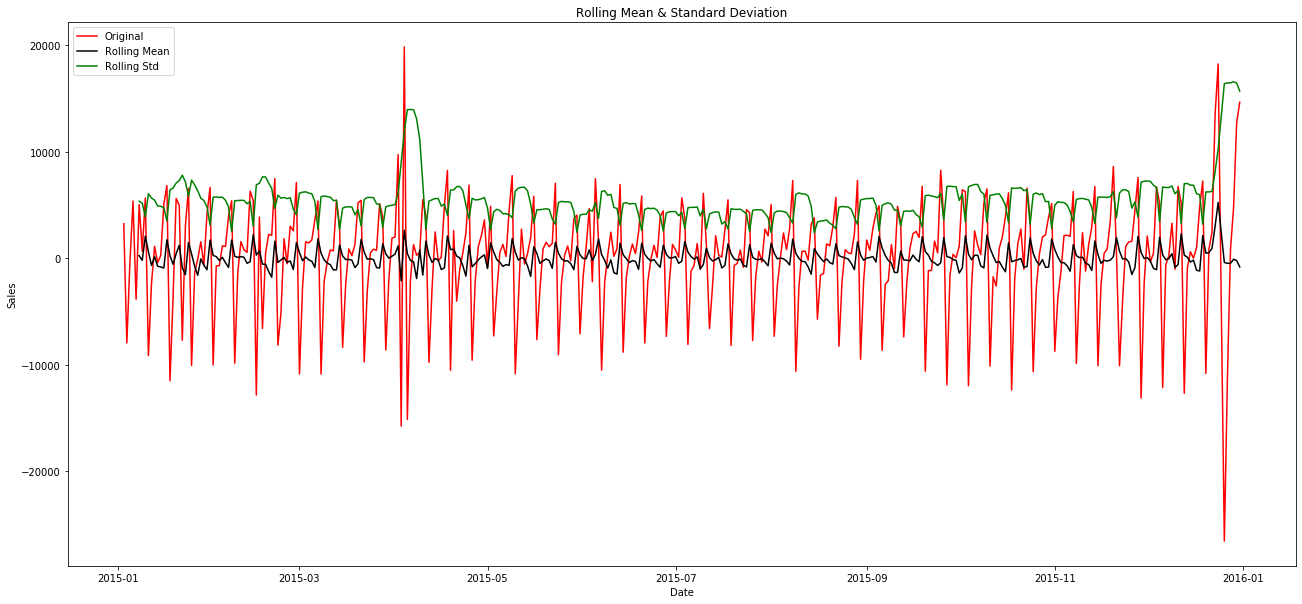

Test statistic:  -5.50324910558439
p-value:  2.048724071660635e-06
Critical Values: {'1%': -3.4492815848836296, '5%': -2.8698813715275406, '10%': -2.5712138845950587}


In [29]:
diff(ts_2015)

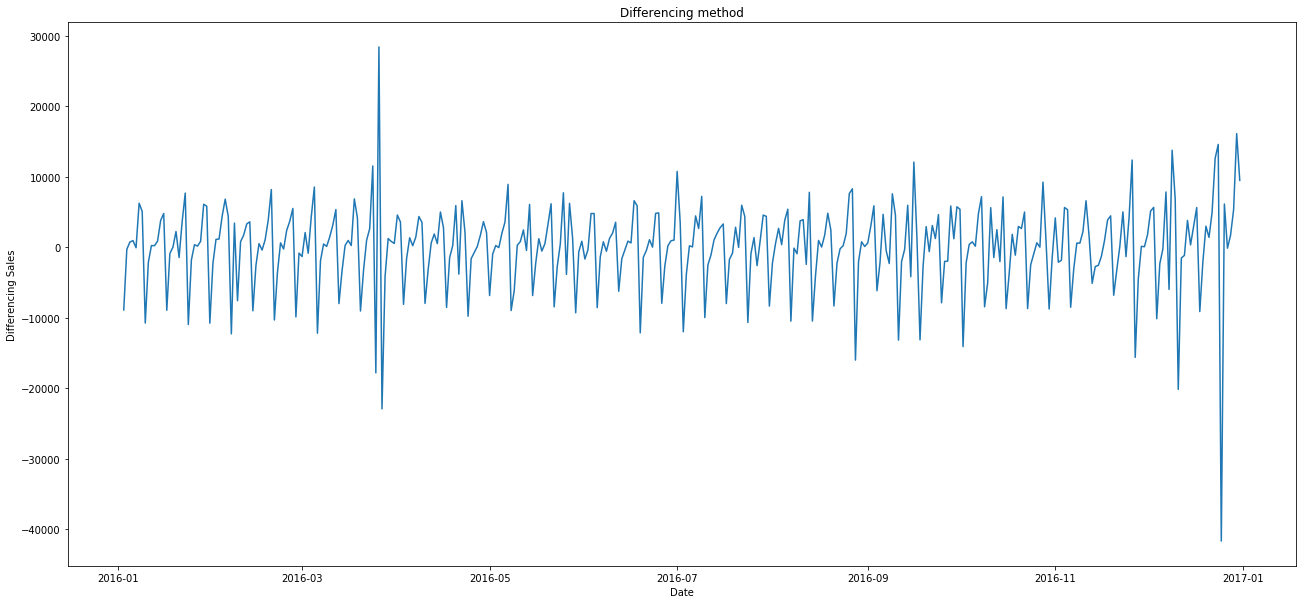

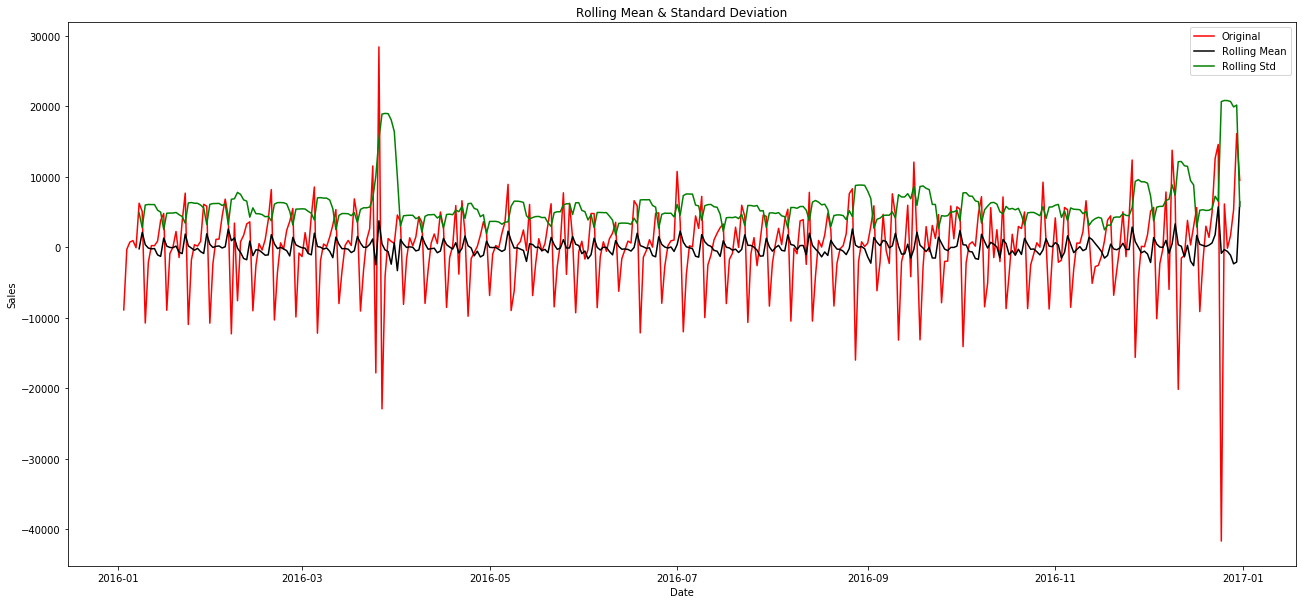

Test statistic:  -5.537298003371199
p-value:  1.7331115768649941e-06
Critical Values: {'1%': -3.449226932880019, '5%': -2.869857365438656, '10%': -2.571201085130664}


In [30]:
diff(ts_2016)

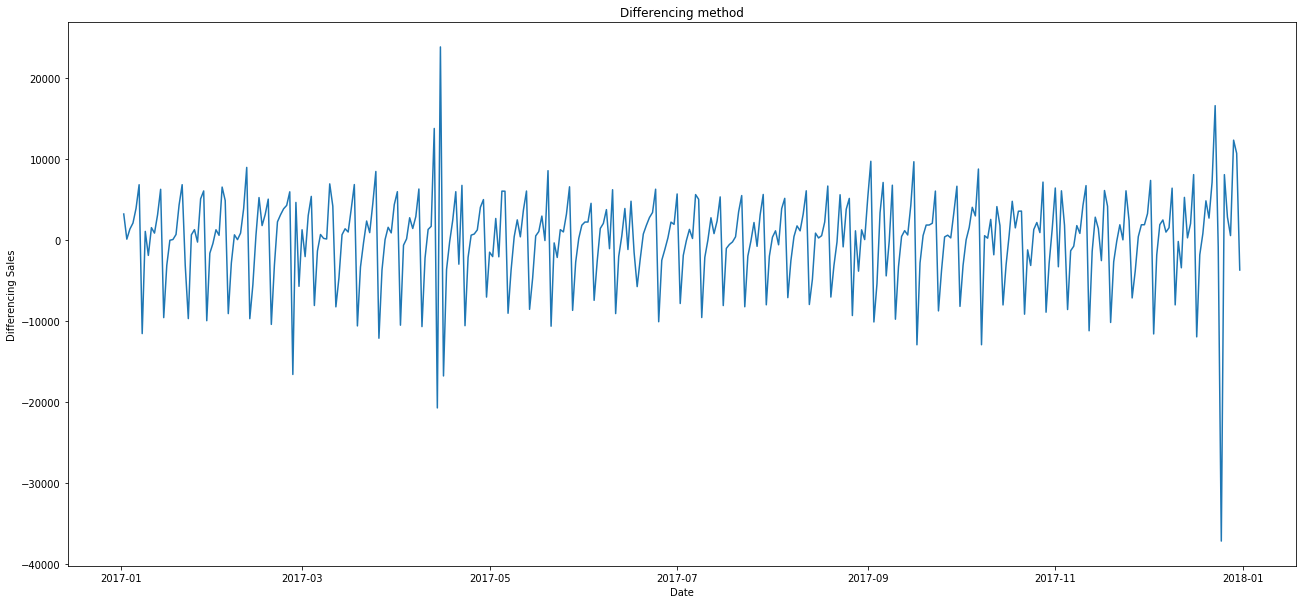

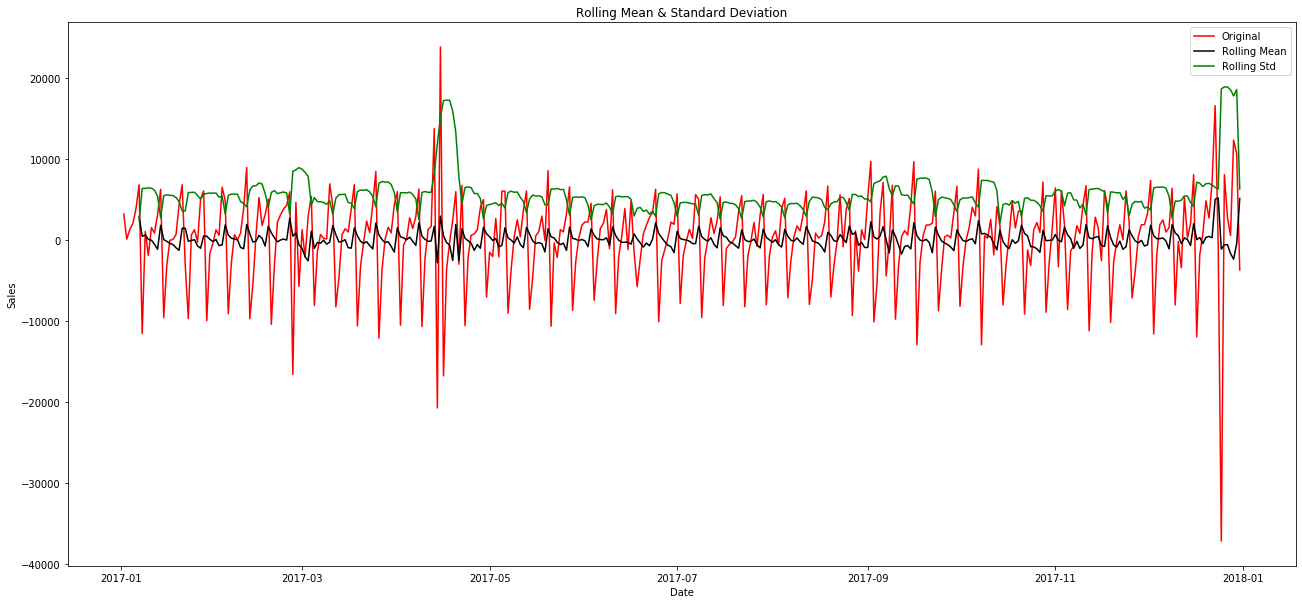

Test statistic:  -5.403490625509265
p-value:  3.330489985528262e-06
Critical Values: {'1%': -3.449226932880019, '5%': -2.869857365438656, '10%': -2.571201085130664}


In [31]:
diff(ts_2017)

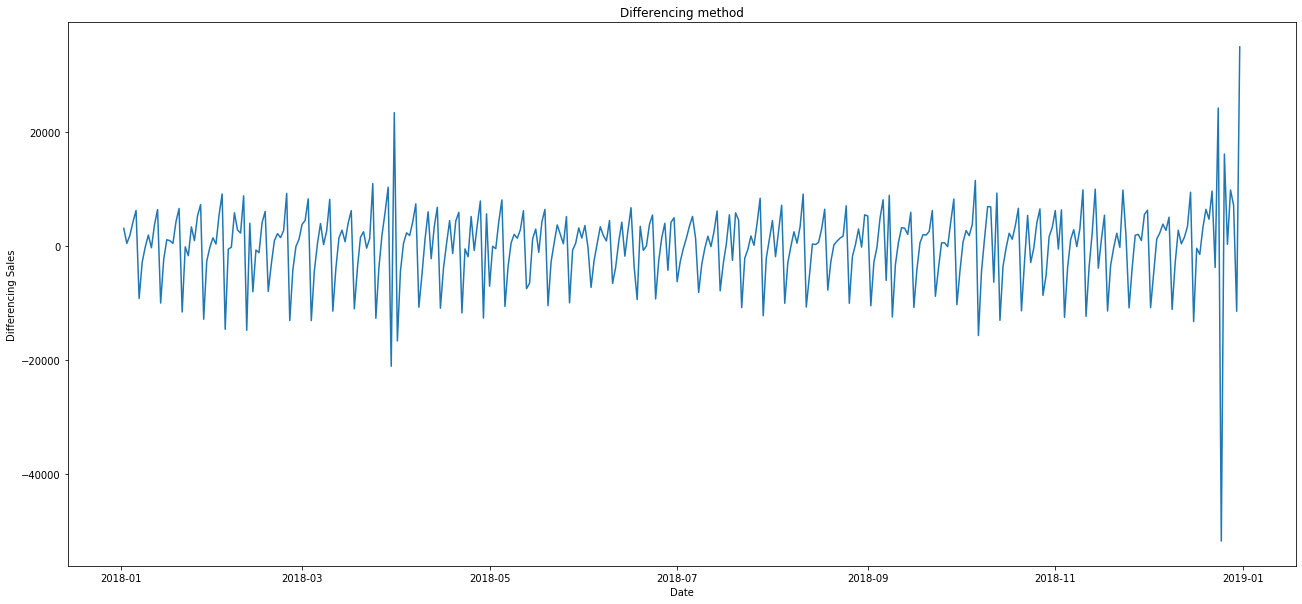

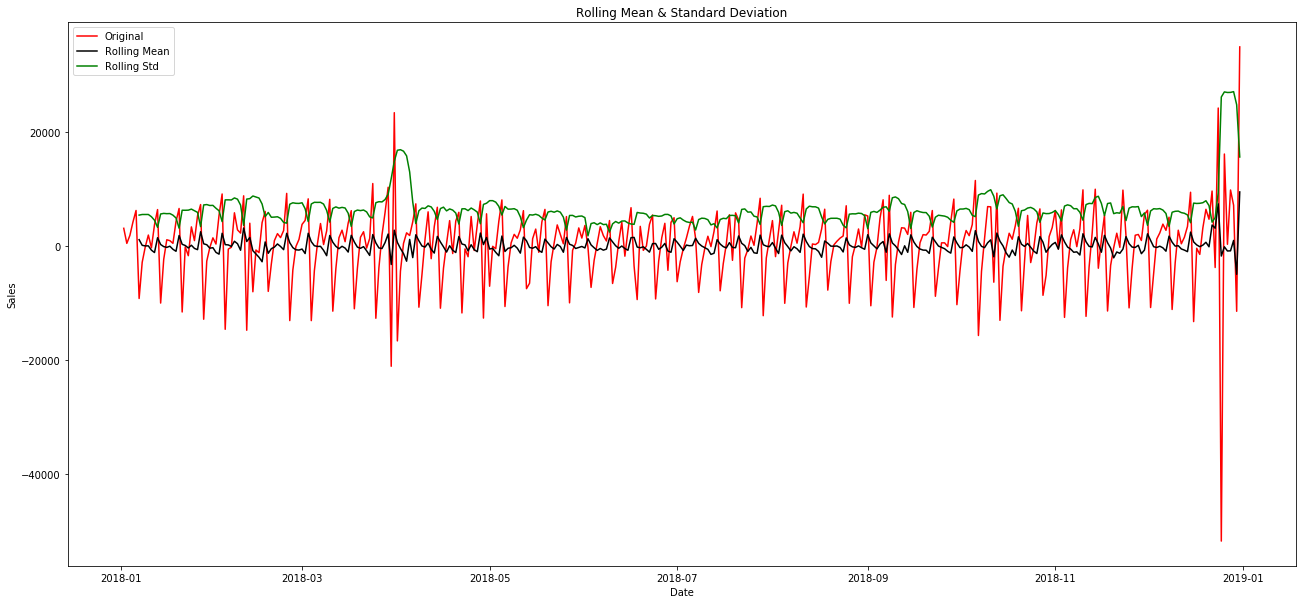

Test statistic:  -4.535121298528602
p-value:  0.00016981849268540023
Critical Values: {'1%': -3.449226932880019, '5%': -2.869857365438656, '10%': -2.571201085130664}


In [32]:
diff(ts_2018)

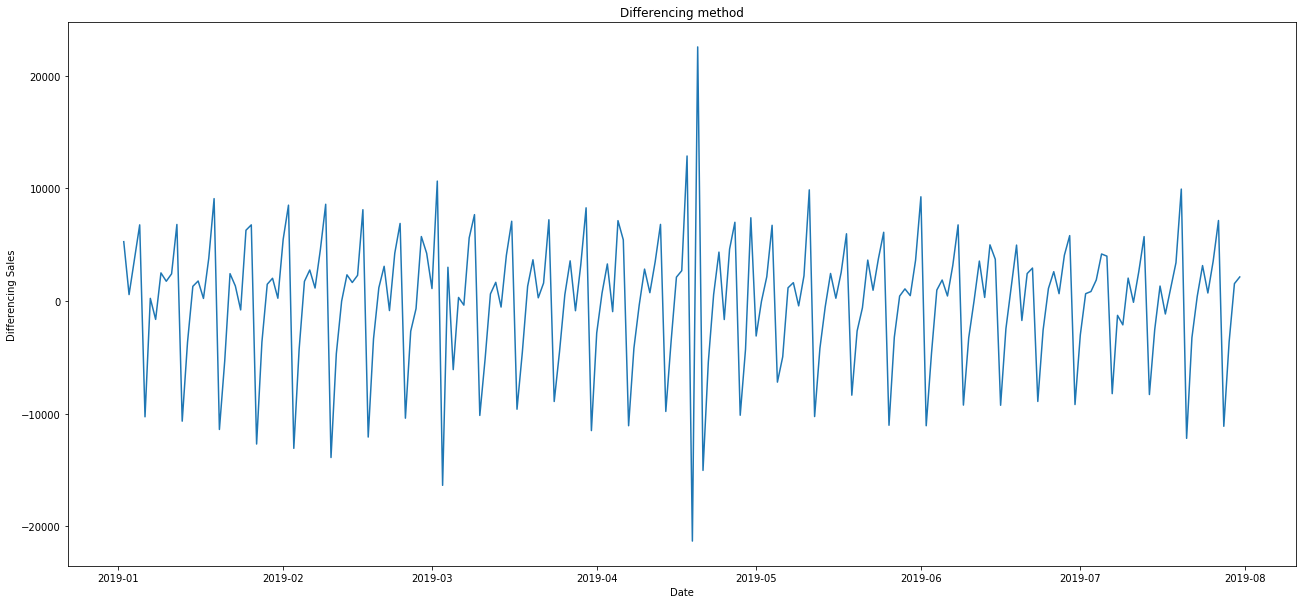

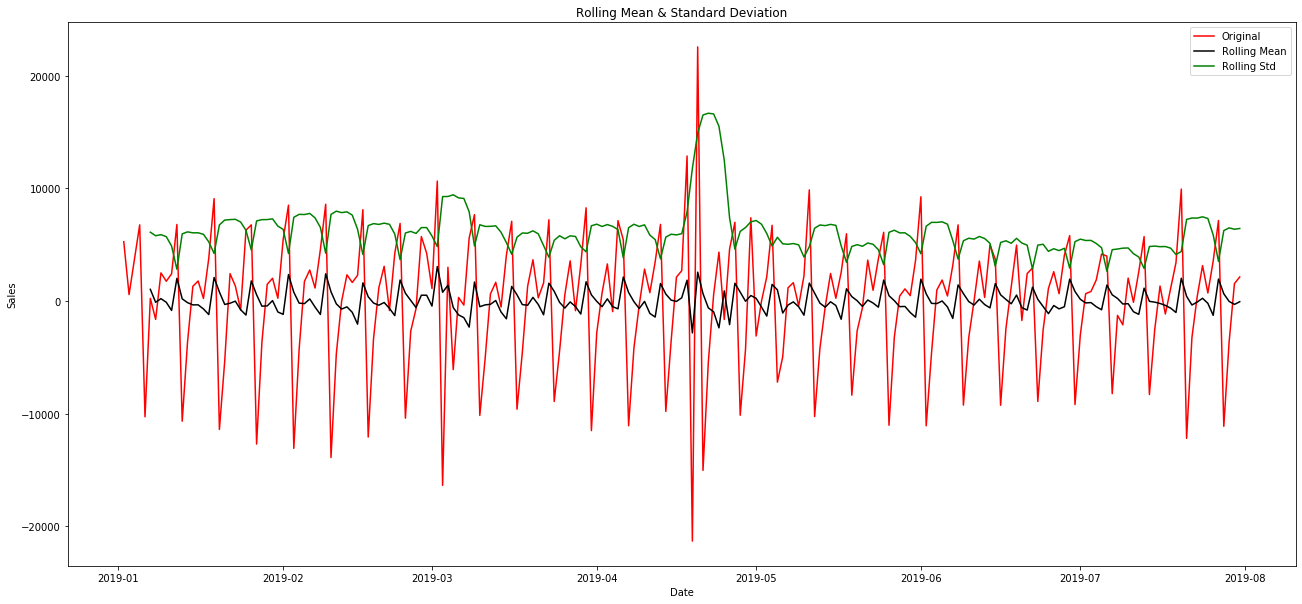

Test statistic:  -7.651893395351357
p-value:  1.780237999320986e-11
Critical Values: {'1%': -3.4638151713286316, '5%': -2.876250632135043, '10%': -2.574611347821651}


In [33]:
diff(ts_2019)

In [34]:
data.columns

Index(['DIA', 'VDA', 'CMV', 'MTA', 'DIA_SEMANA', 'TIPO_FERIADO',
       'FERIADO_BOOL'],
      dtype='object')

In [48]:
ts_diff = ts - ts.shift()
ts_diff.dropna(inplace=True)
ts_diff.head()

,y
ds,
2015-01-03,3224.67
2015-01-04,-7962.57
2015-01-05,-416.43
2015-01-06,5354.71
2015-01-07,-3859.45


In [49]:
ts.tail()

,y
ds,
2019-07-27,17433.34
2019-07-28,6299.95
2019-07-29,2664.87
2019-07-30,4209.87
2019-07-31,6348.06


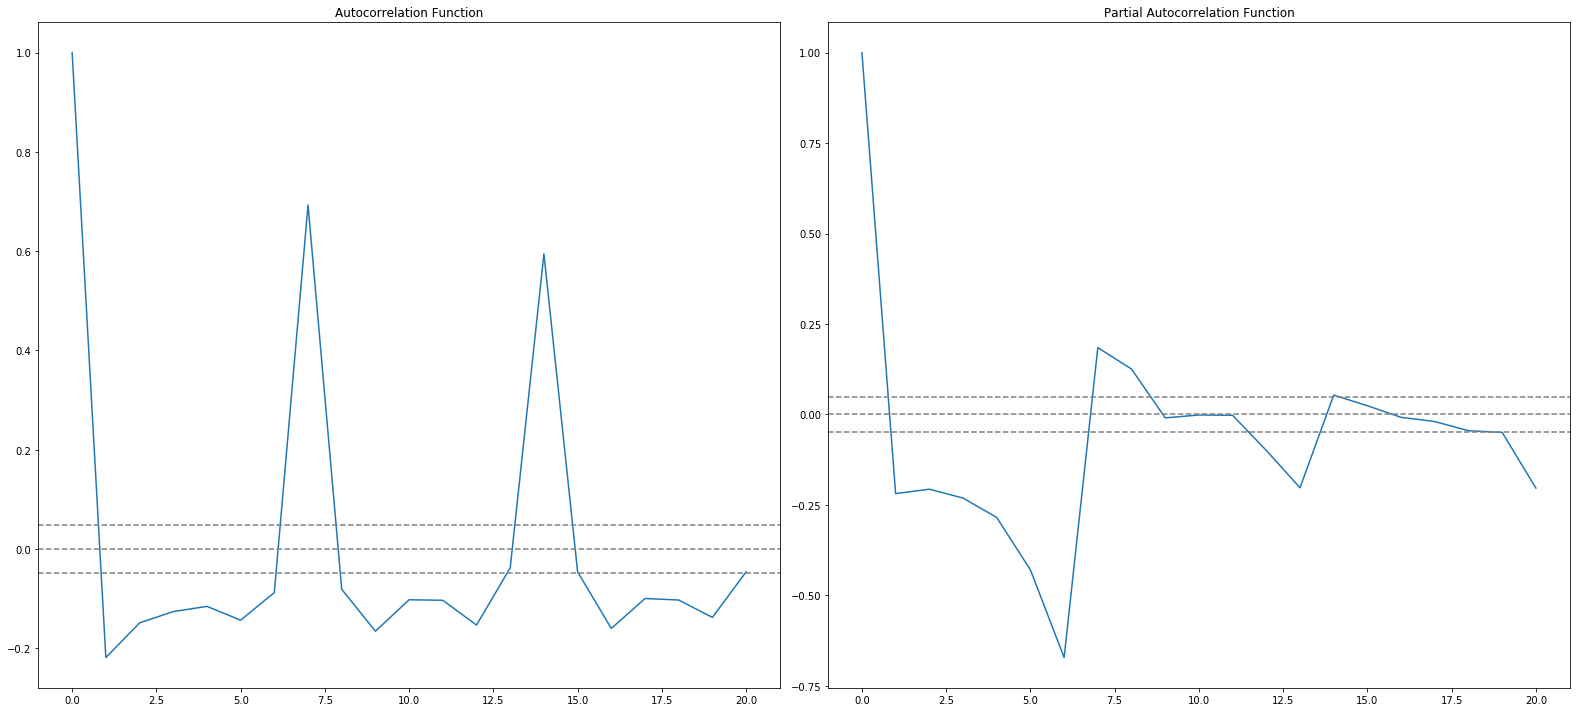

In [50]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\maria\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



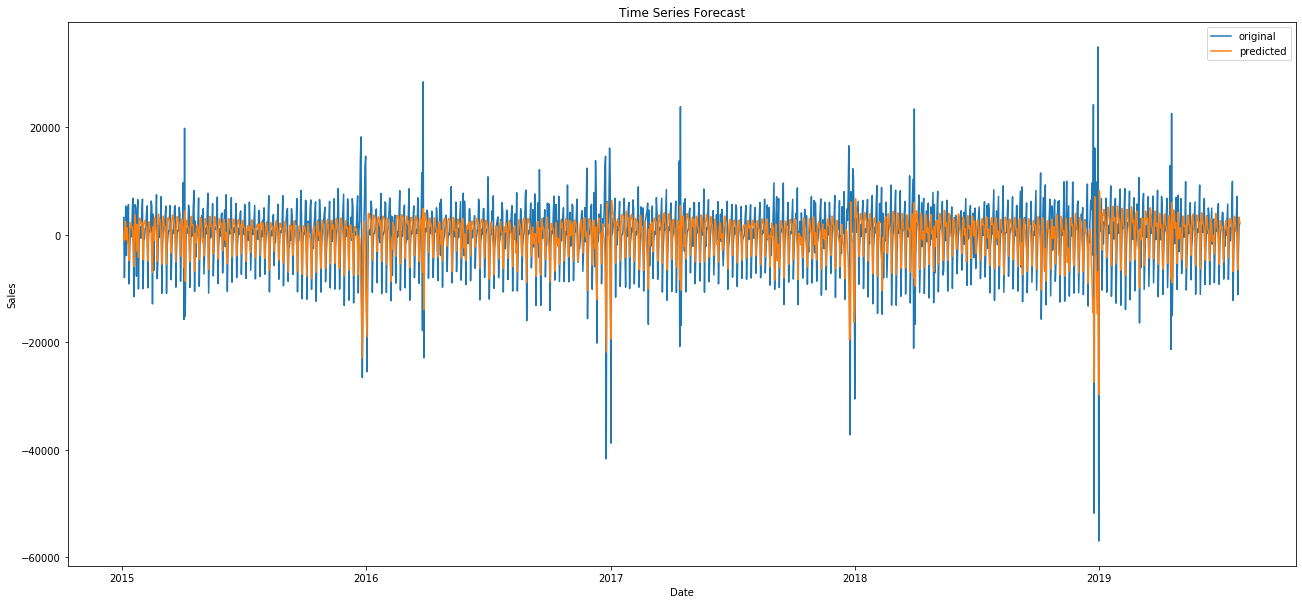

In [59]:
# ARIMA LİBRARY
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(ts_diff, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit(disp=0)

# predict
start_index = datetime(2015, 1, 3)
end_index = datetime(2019, 7, 31)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(22,10))
plt.plot(ts_diff.index,ts_diff.y,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [ ]:
# predict all path
from sklearn.metrics import mean_squared_error
# fit model
model2 = ARIMA(ts_diff, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit2 = model2.fit(disp=0)
forecast2 = model_fit2.predict()
error = mean_squared_error(ts_diff, forecast2)
print("error: " ,error)
# visualization
plt.figure(figsize=(22,10))
plt.plot(ts_diff.index,weather_bin.MeanTemp,label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.savefig('graph.png')

plt.show()